In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

Uploading dataset

In [2]:
df =pd.read_csv('/content/my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


**EDA**

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
df1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [7]:
df1.shape

(10, 10)

**Visualization**

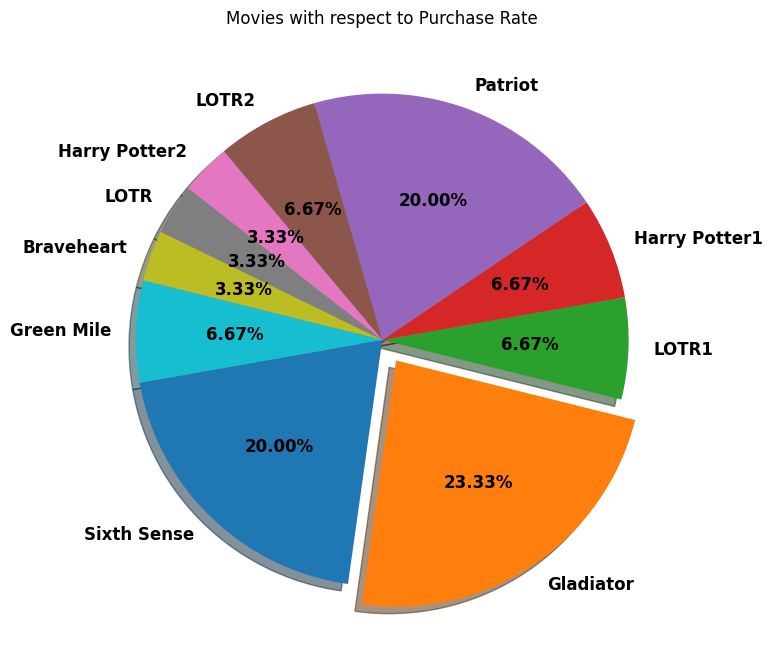

In [8]:
plt.figure(figsize=(12,8))
plt.pie(df1.sum(),
        labels=df1.columns,
        explode=[0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops={'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
plt.title('Movies with respect to Purchase Rate')
plt.show()

In [9]:
#top 10 Popular items
count = df1.loc[:,:].sum()
count.sort_values(0,ascending=False,inplace=True)
count= count.to_frame().reset_index()
count = count.rename(columns={'index':'item',0:'count'})
count


,item,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


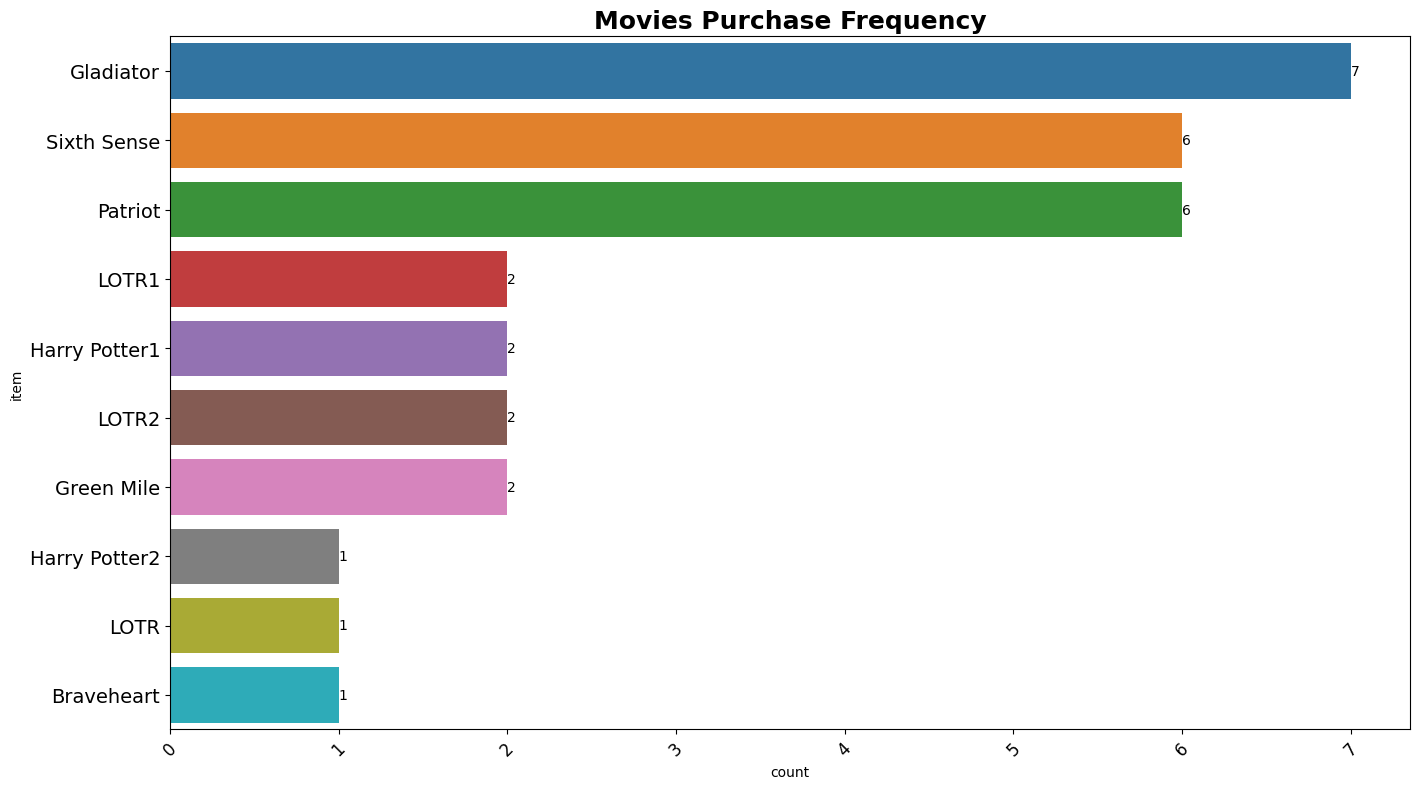

In [10]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x='count',y='item',data=count)
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.title('Movies Purchase Frequency',fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [11]:
item_sets={}

In [12]:
te = TransactionEncoder()

In [13]:
te_ary = te.fit(df1).transform(df1)

In [14]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

**APRIORI ALGORITHM**

In [15]:
ap_0_5 = {}
ap_1 = {}
ap_5={}
ap_1_0 = {}

In [16]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [17]:
def gen_rules(df,confidence,support):
  ap={}
  for i in confidence:
    ap_i=apriori(df1,support,True)
    rule=association_rules(ap_i,min_threshold=i)
    ap[i]=len(rule.antecedents)
  return pd.Series(ap).to_frame('Support: %s'%support)

In [19]:
confs=[]
for i in [0.005, 0.001, 0.003, 0.007]:
  ap_i = gen_rules(ap,confidence=confidence,support=i)
  confs.append(ap_i)

In [20]:
all_conf = pd.concat(confs,axis=1)

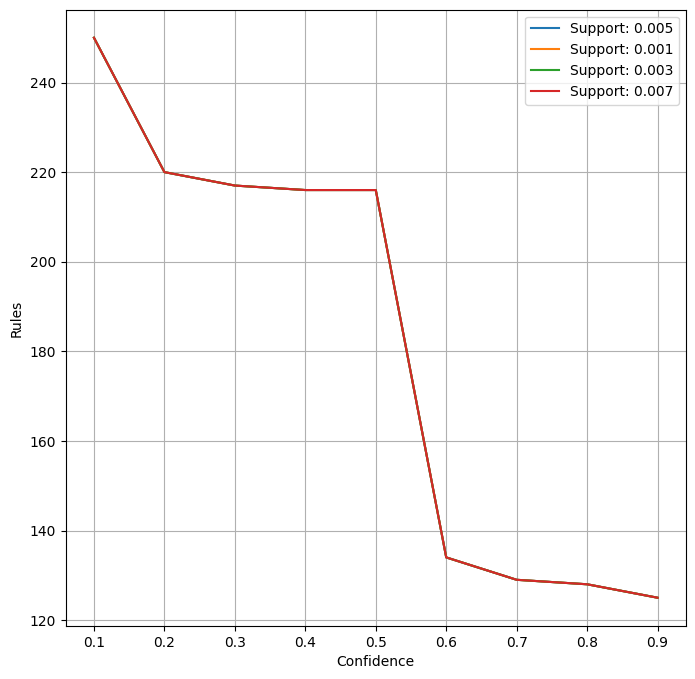

In [22]:
all_conf.plot(figsize=(8,8),grid=True)
plt.xlabel('Confidence')
plt.ylabel('Rules')
plt.show()

**CONCLUSION OF ABOVE GRAPH**

1.   Lower the Confidence level Higher the no. of rules.

2.   Higher the Support, lower the no. of rules.







**Let's try with Support 0.005 and Confidence 0.4**

In [23]:
ap_final = apriori(ap,0.005,True)

In [24]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [25]:
rules_final[rules_final['confidence']>0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf,0.666667
7,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8,0.571429
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf,0.666667
11,( ),(e),0.4,0.5,0.4,1.000000,2.000000,0.20,inf,0.833333
...,...,...,...,...,...,...,...,...,...,...
113721,"(2, e)","(a, H, o, y, , t, P, r)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113723,"( , 2)","(a, H, o, y, e, t, P, r)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113725,"(2, t)","(a, H, o, y, e, , r, P)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113726,"(2, r)","(a, H, o, y, e, , t, P)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889


In [26]:
support = rules_final['support']
confidence = rules_final['confidence']
lift = rules_final['lift']

Text(0.5, 0, 'Lift')

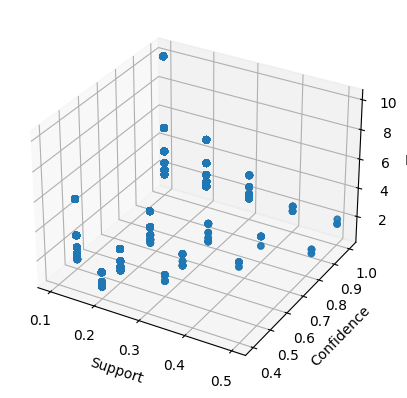

In [28]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel('Support')
ax1.set_ylabel('Confidence')
ax1.set_zlabel('Lift')

Text(0, 0.5, 'confidence')

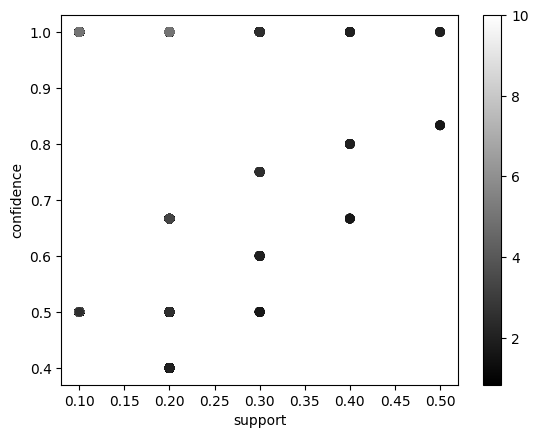

In [33]:
plt.scatter(support,confidence,c=lift,cmap='gray')
plt.colorbar()
plt.xlabel('support')
plt.ylabel('confidence')